#Rare Labels: Labels that occur rarely

Categorical variables are those which values are selected from a group of categories, also called labels. Different labels appear in  the dataset with different frequencies. Some categories appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldom.


Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Portuguese language (por). In [Cortez and Silva, 2008], the dataset was modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see "student performance.txt" for more details).

Attribute Information:
see "student performance.txt" to know about the features of this dat aset

### these grades are related with the course subject Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

Loading the data

In [2]:
data_raw = pd.read_csv('C:\\Users\gusal\machine learning\Feature engineering\student-por.csv', delimiter= ';')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_raw.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


In [5]:
data_raw.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


FINDING NAN, empty spaces in the dataset

In [6]:
data_raw.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

THERE ARE NOT NULL VALUES

In [7]:
data_raw.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### distribution of the variable

Text(0, 0.5, 'number of students')

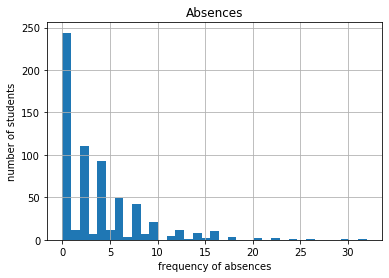

In [8]:
# let's make a histogram to get familiar with the
# distribution of the variable

fig = data_raw.absences.hist(bins = 35)

fig.set_title('Absences')
fig.set_xlabel('frequency of absences')
fig.set_ylabel('number of students')

In [46]:
data_raw.absences.unique()

array([ 4,  2,  6,  0, 10,  8, 16, 14,  1, 12, 24, 22, 32, 30, 21, 15,  9,
       18, 26,  7, 11,  5, 13,  3], dtype=int64)

Text(0, 0.5, 'number of students')

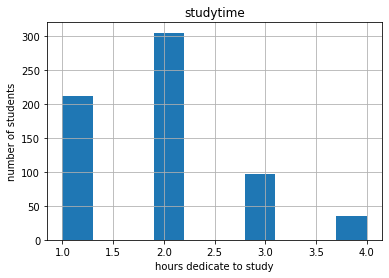

In [10]:
# let's make a histogram to get familiar with the
# distribution of the variable

fig = data_raw.studytime.hist()

fig.set_title('studytime')
fig.set_xlabel('hours dedicate to study')
fig.set_ylabel('number of students')

Text(0, 0.5, 'Number of students')

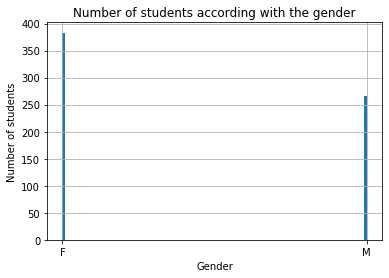

In [12]:
### Discrete Variables# let's make an histogram to get familiar with the
# distribution of the variable

fig = data_raw.sex.hist(bins=100)

# for better visualisation, I display only specific
# range in the x-axis
#fig.set_xlim(0, 30)

# title and axis legends
fig.set_title('Number of students according with the gender')
fig.set_xlabel('Gender')
fig.set_ylabel('Number of students')

In [13]:
data_raw.failures.unique()

array([0, 3, 1, 2], dtype=int64)

Text(0, 0.5, 'Number of students')

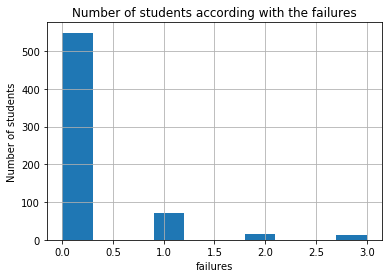

In [14]:
### let's make an histogram to get familiar with the
# distribution of the variable

fig = data_raw.failures.hist()

# for better visualisation, I display only specific
# range in the x-axis
#fig.set_xlim(0, 30)

# title and axis legends
fig.set_title('Number of students according with the failures')
fig.set_xlabel('failures')
fig.set_ylabel('Number of students')

Should be group failures higher than zero

RARE LABELS

In [15]:
data_raw.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
cat_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences',]

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data_raw[col].nunique())

print('total students: ', len(data_raw))

variable:  school  number of labels:  2
variable:  sex  number of labels:  2
variable:  age  number of labels:  8
variable:  address  number of labels:  2
variable:  famsize  number of labels:  2
variable:  Pstatus  number of labels:  2
variable:  Medu  number of labels:  5
variable:  Fedu  number of labels:  5
variable:  Mjob  number of labels:  5
variable:  Fjob  number of labels:  5
variable:  reason  number of labels:  4
variable:  guardian  number of labels:  3
variable:  traveltime  number of labels:  4
variable:  studytime  number of labels:  4
variable:  failures  number of labels:  4
variable:  schoolsup  number of labels:  2
variable:  famsup  number of labels:  2
variable:  paid  number of labels:  2
variable:  activities  number of labels:  2
variable:  nursery  number of labels:  2
variable:  higher  number of labels:  2
variable:  internet  number of labels:  2
variable:  romantic  number of labels:  2
variable:  famrel  number of labels:  5
variable:  freetime  number of

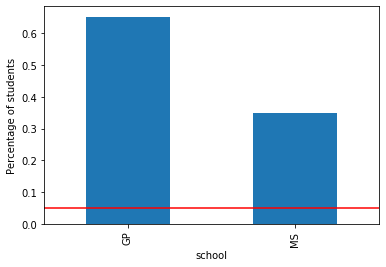

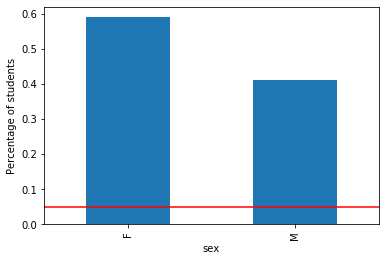

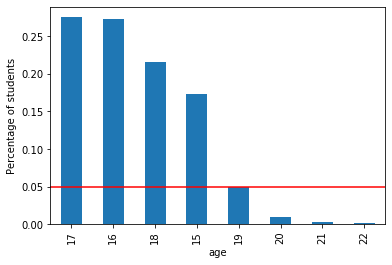

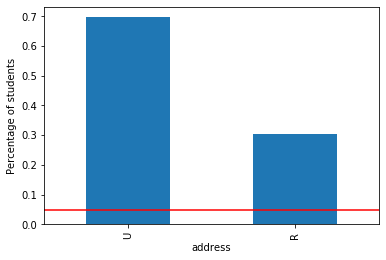

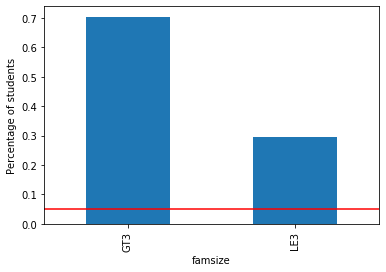

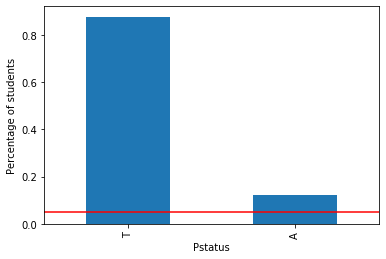

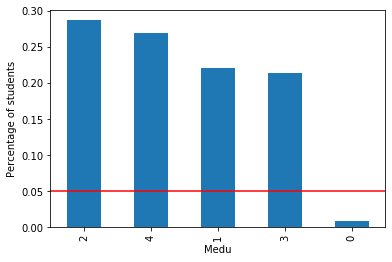

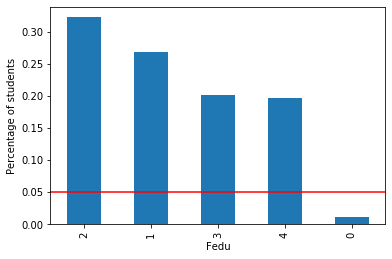

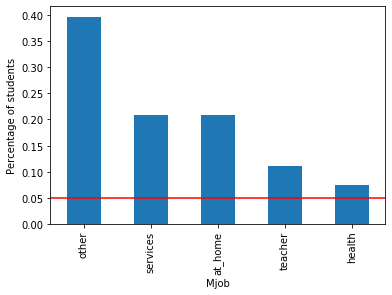

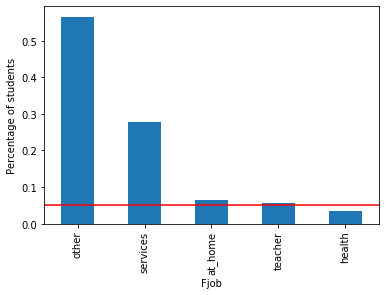

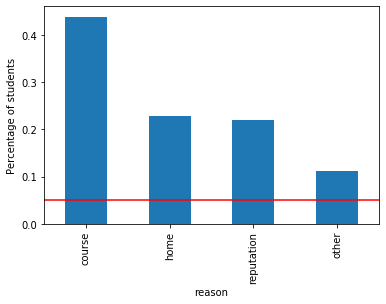

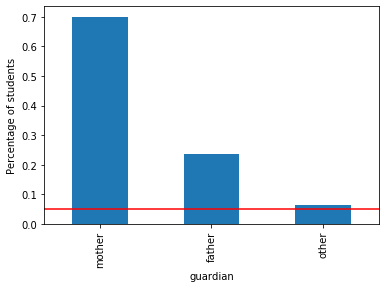

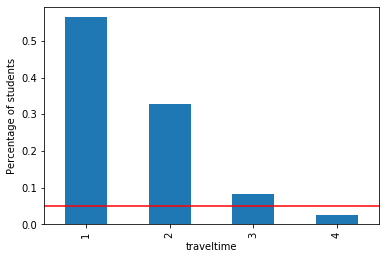

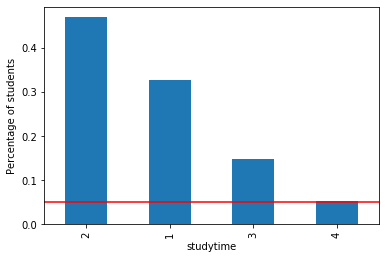

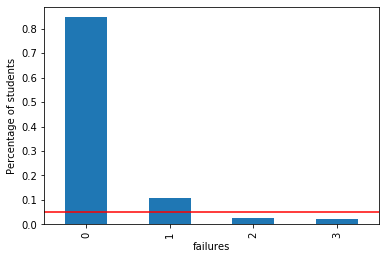

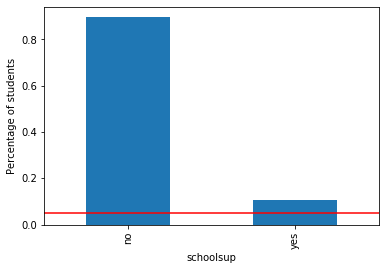

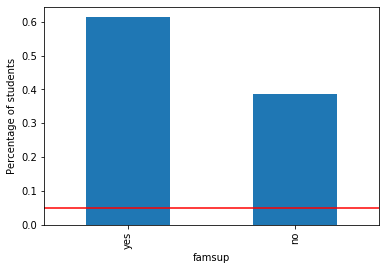

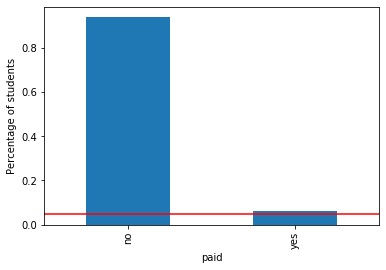

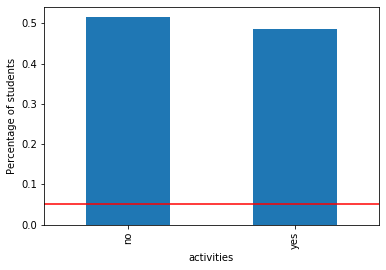

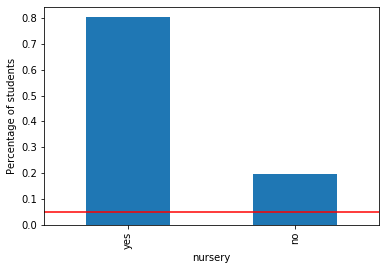

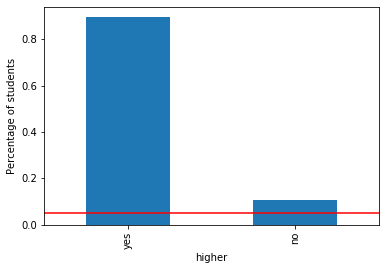

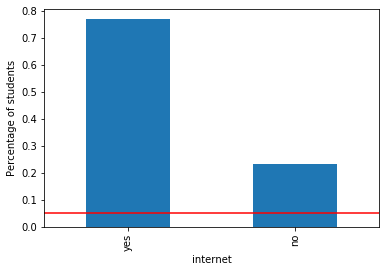

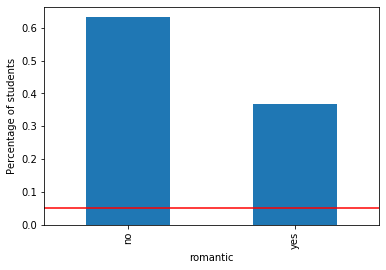

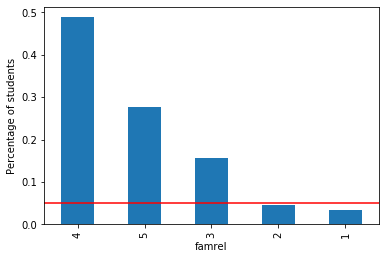

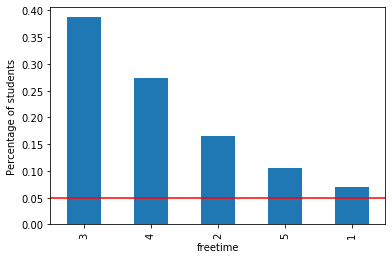

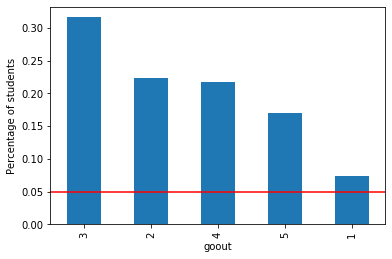

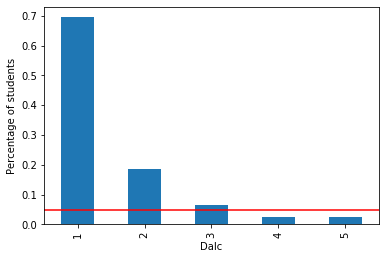

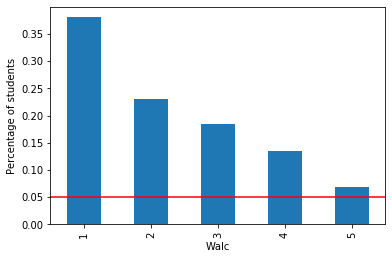

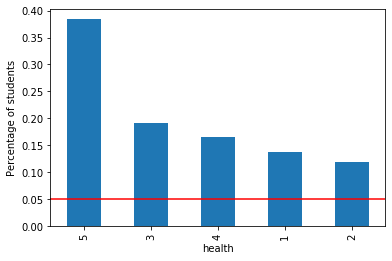

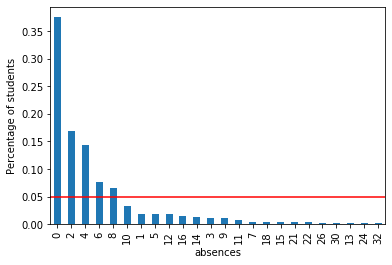

In [17]:
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of students in the data
# with each label

total_students = len(data_raw)

# for each categorical variable
for col in cat_cols:

    # count the number of students per category
    # and divide by total students

    # aka percentage of students per category

    temp_df = pd.Series(data_raw[col].value_counts() / total_students)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of students')
    plt.show()

MORE THAN 10 ABSENCES ARE RARE - THEREFORE WE SHOULD make groups

For each of the categorical variables, some labels appear in more than 10% of the students and many appear in less than 10% or even 5% of the students. These are infrequent labels or **Rare Values** and could cause over-fitting.

How is the target, "G3", related to these categories?

In the following cells, I want to understand the mean G3 per group of students that display each categories.


In [18]:
# the following function calculates:

# 1) the percentage of students per category
# 2) the mean G3 per category


def calculate_mean_target_per_category(df, var):

    # total number of students
    total_students = len(df)

    # percentage of students per category
    temp_df = pd.Series(df[var].value_counts() / total_students).reset_index()
    temp_df.columns = [var, 'perc_students']

    # add the mean G3
    temp_df = temp_df.merge(df.groupby([var])['G3'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [19]:
# now we use the function for the variable 'school'
temp_df = calculate_mean_target_per_category(data_raw, 'school')
temp_df

,school,perc_students,G3
0,GP,0.651772,12.576832
1,MS,0.348228,10.650442


The above dataframe contains the percentage of students in each school, and the mean of G3 for those group of students. In other words, ~65% of students are in GP and the mean G3 is 12.5768.

In [20]:
# Now I create a function to plot of the
# category frequency and mean G3.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_students"], color='lightgrey')
    ax2.plot(df.index, df["G3"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.axhline(y=0.1, color='orange')
    ax.set_ylabel('percentage of students per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average G3 per category')
    plt.show()

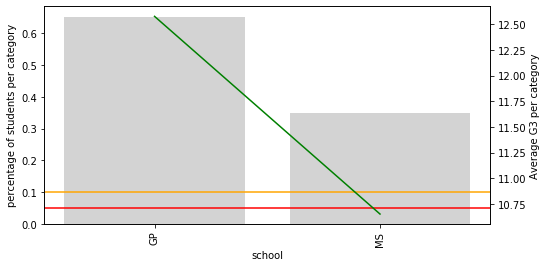

In [21]:
plot_categories(temp_df, 'school')

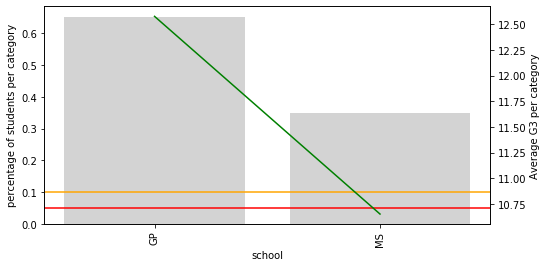

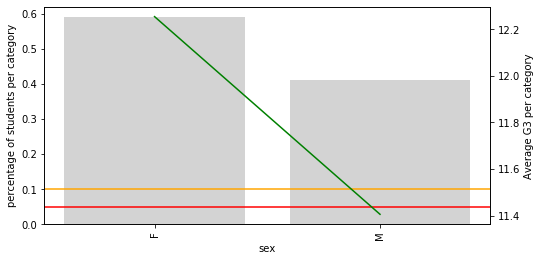

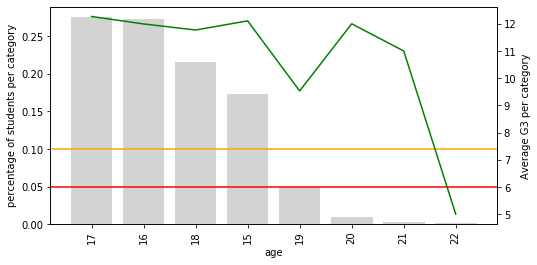

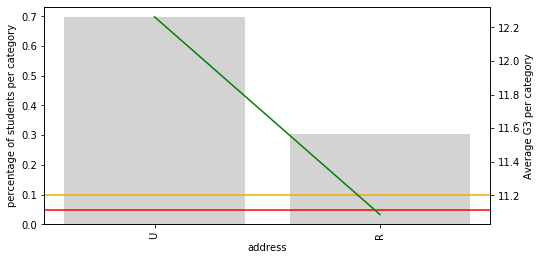

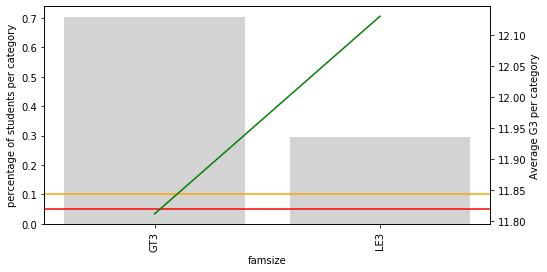

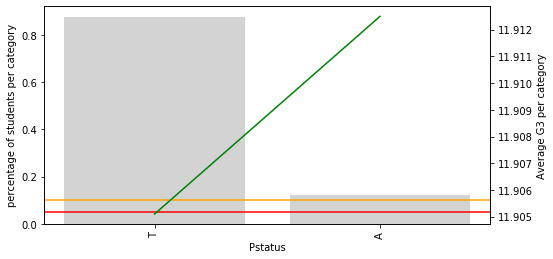

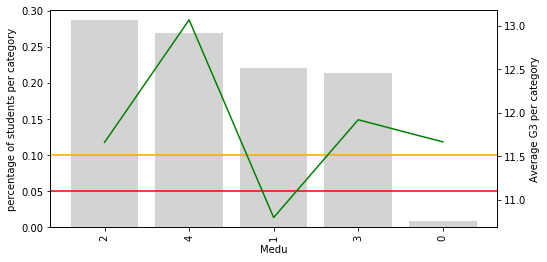

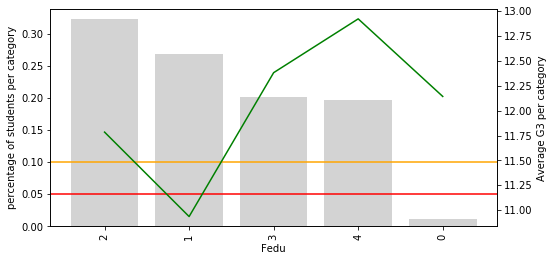

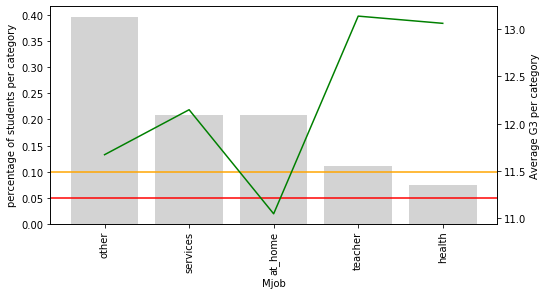

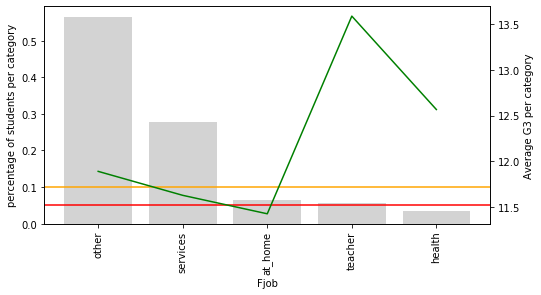

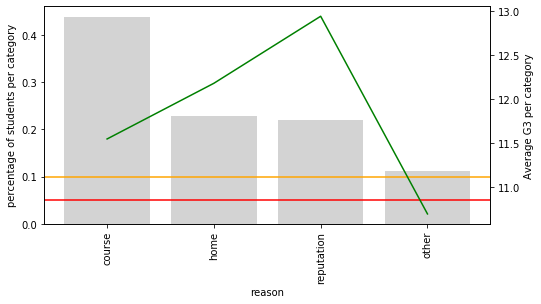

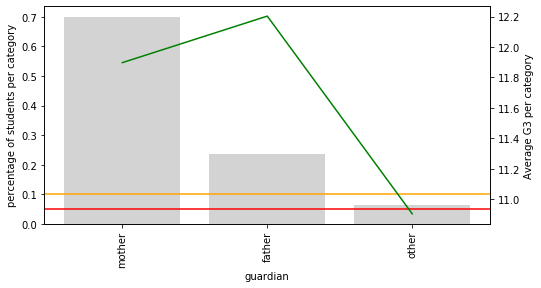

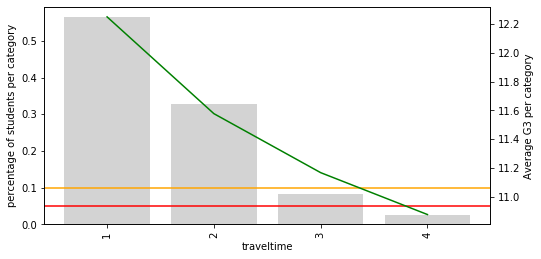

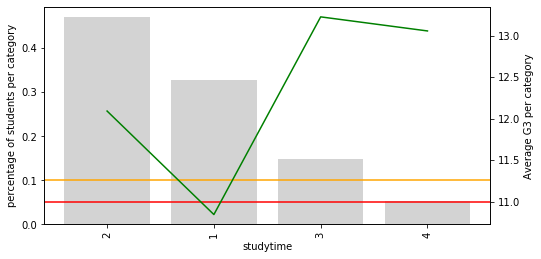

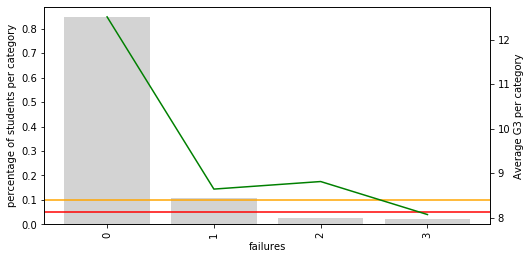

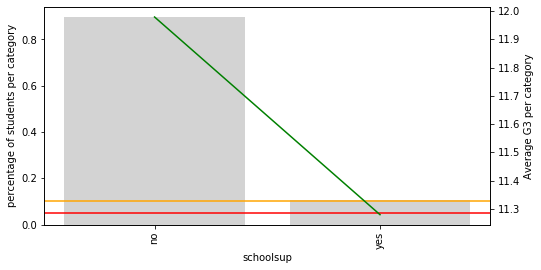

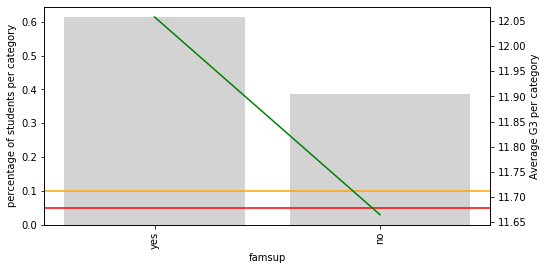

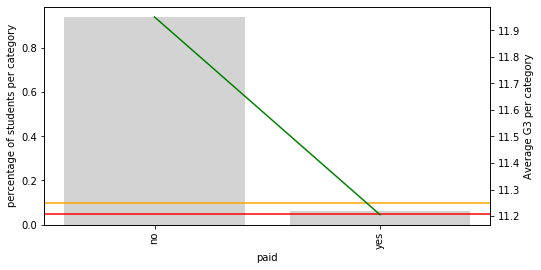

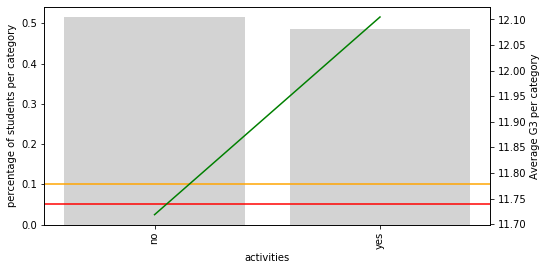

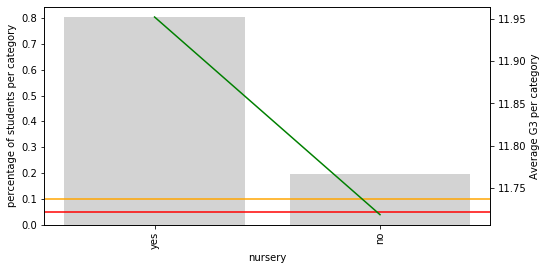

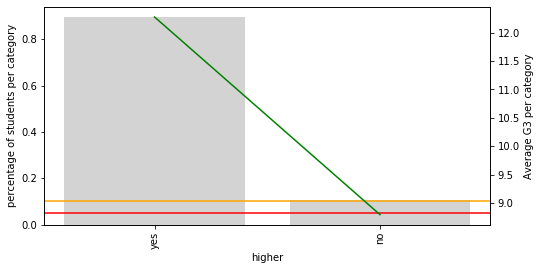

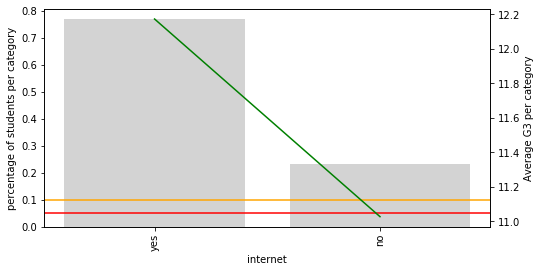

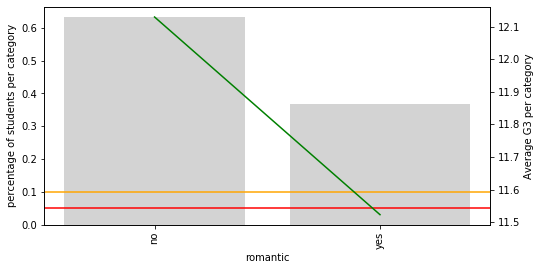

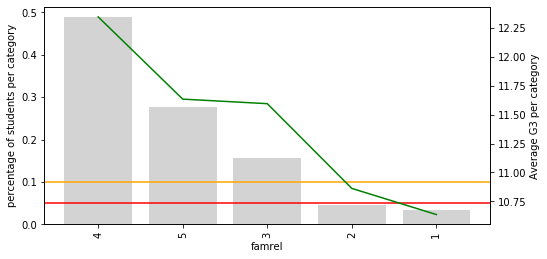

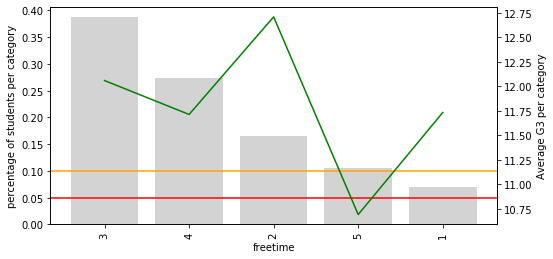

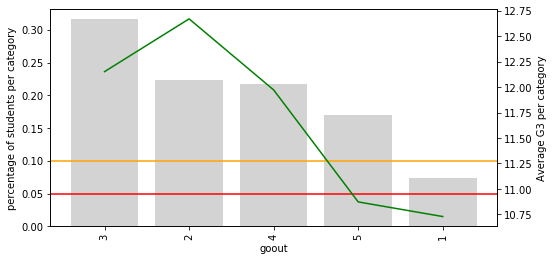

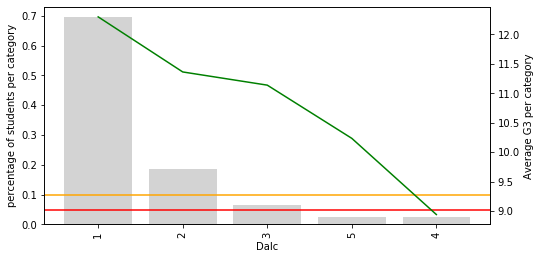

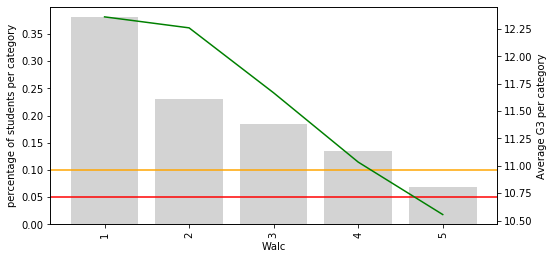

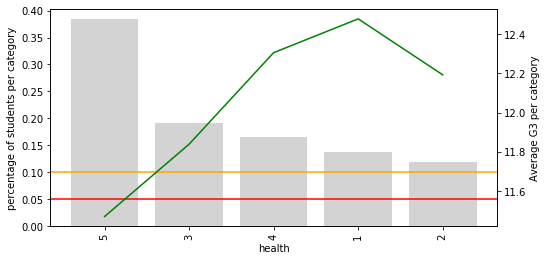

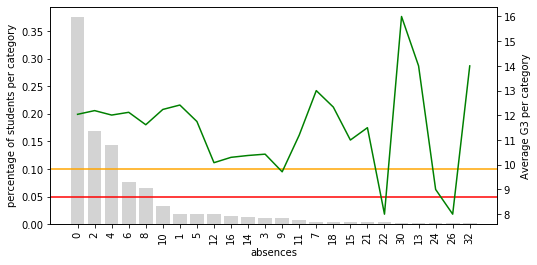

In [22]:
# let's plot the remaining categorical variables

for col in cat_cols:
    
    # we plotted this variable already
    
        
        # re using the functions I created
    temp_df = calculate_mean_target_per_category(data_raw, col)
    plot_categories(temp_df, col)

There are few students with 30, 32, 7 and 13 absences, these groups have
a very high G3 and also they are a very small percentage of the total students.
why is this important? Because there is not enough students in this categories
to learn from, we could be under or over estimating the effect of this groups
in the G3

In other words, how confident are we to generalise that most student with these numbers of absences get an average G3 higher than 13, when we only have a few students to learn from?

### Rare labels: grouping under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [23]:
# I will replace all the labels that appear in less than 6%
# of the students by the label 'rare'


def group_rare_labels(df, var):

    total_students = len(df)

    # first I calculate the % of students for each category
    temp_df = pd.Series(df[var].value_counts() / total_students)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 6% of students

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.06].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [24]:
# group rare labels in absences

data_raw['absences_grouped'] = group_rare_labels(data_raw, 'absences')

data_raw[['absences', 'absences_grouped']].head(20)

,absences,absences_grouped
0,4,4
1,2,2
2,6,6
3,0,0
4,0,0
5,6,6
6,0,0
7,2,2
8,0,0
9,0,0


In [25]:
data_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_grouped
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,0


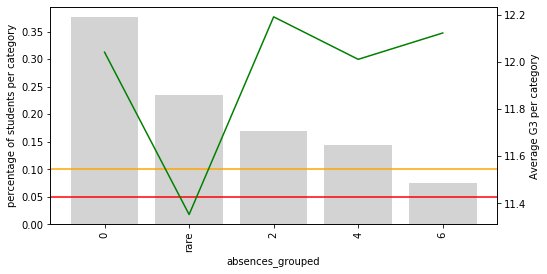

In [26]:
# let's plot absences with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data_raw, 'absences_grouped')
plot_categories(temp_df, 'absences_grouped')

"Rare" now contains the overall influence of all the infrequent categories on absences.

Only 5 categories of absences are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average G3 for all the infrequent labels.

# let's group and plot the remaining categorical variables

# in this case the code does not work very well, because the rare category involve only one item in some variables. different was the case for absences, where many items was grouped in the label rare


for col in cat_cols[1:]:
        
    # re using the functions I created
    data_raw[col+'_grouped'] = group_rare_labels(data_raw, col)
    temp_df = calculate_mean_target_per_category(data_raw, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')
    
# we decided to analyze individual case.    

In [27]:
# group rare labels in famrel

data_raw['famrel_grouped'] = group_rare_labels(data_raw, 'famrel')

data_raw[['famrel', 'famrel_grouped']].head(5)

,famrel,famrel_grouped
0,4,4
1,5,5
2,4,4
3,3,3
4,4,4


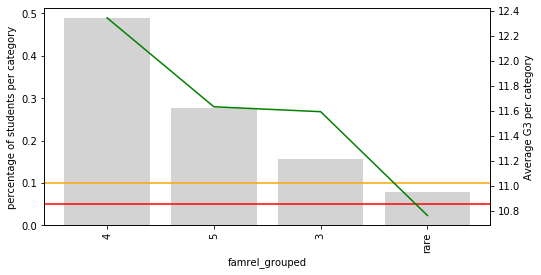

In [28]:
# let's plot famrel with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data_raw, 'famrel_grouped')
plot_categories(temp_df, 'famrel_grouped')

In [29]:
# group rare labels in age

data_raw['age_grouped'] = group_rare_labels(data_raw, 'age')

data_raw[['age', 'age_grouped']].head(5)

,age,age_grouped
0,18,18
1,17,17
2,15,15
3,15,15
4,16,16


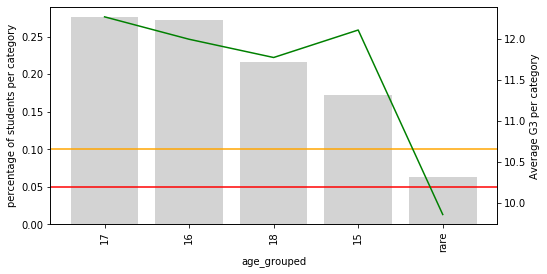

In [30]:
# let's plot age with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data_raw, 'age_grouped')
plot_categories(temp_df, 'age_grouped')

In [31]:
# group rare labels in failures

data_raw['failures_grouped'] = group_rare_labels(data_raw, 'failures')

data_raw[['failures', 'failures_grouped']].head(5)

,failures,failures_grouped
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


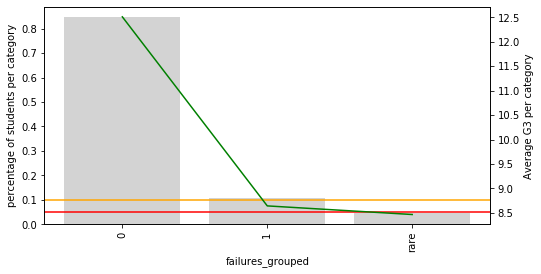

In [32]:
# let's plot failures with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data_raw, 'failures_grouped')
plot_categories(temp_df, 'failures_grouped')

In [33]:
# group rare labels in traveltime

data_raw['traveltime_grouped'] = group_rare_labels(data_raw, 'traveltime')

data_raw[['traveltime', 'traveltime_grouped']].head(5)

,traveltime,traveltime_grouped
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1


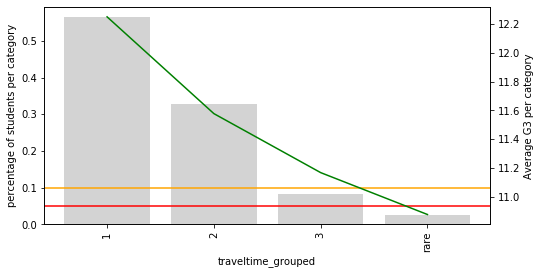

In [34]:
# let's plot traveltime with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data_raw, 'traveltime_grouped')
plot_categories(temp_df, 'traveltime_grouped')

In [35]:
data_raw.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_grouped,famrel_grouped,age_grouped,failures_grouped,traveltime_grouped
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,4,4,18,0,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,2,5,17,0,1


In [36]:
data_raw.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'absences_grouped',
       'famrel_grouped', 'age_grouped', 'failures_grouped',
       'traveltime_grouped'],
      dtype='object')

In [37]:
column_add = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'absences_grouped',
       'famrel_grouped', 'age_grouped', 'failures_grouped',
       'traveltime_grouped']

### Rare labels lead to uneven distribution of categories in train and test sets

Similarly to highly cardinal variables, rare or infrequent labels often land only on the training set, or only on the testing set. If present only in the training set, they may lead to over-fitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as they have not seen the rare labels during training. Let's explore this further.

In [38]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_raw[cat_cols],
                                                    data_raw['G3'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((454, 30), (195, 30))

In [39]:
# Let's find labels present only in the training set
# I will use X2 as example

unique_to_train_set = [
    x for x in X_train['absences'].unique() if x not in X_test['absences'].unique()
]

print(unique_to_train_set)

[18, 30, 13, 26]


There are 4 categories present in the train set and are not present in the test set.

In [40]:
# Let's find labels present only in the test set

unique_to_test_set = [
    x for x in X_test['absences'].unique() if x not in X_train['absences'].unique()
]

print(unique_to_test_set)

[22, 32, 24]


In this case, there are 3 rare values present in the test set only.

let check with absences_grouped

In [41]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_raw[column_add],
                                                    data_raw['G3'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((454, 38), (195, 38))

In [42]:
# Let's find labels present only in the training set
# I will use X2 as example

unique_to_train_set = [
    x for x in X_train['absences_grouped'].unique() if x not in X_test['absences_grouped'].unique()
]

print(unique_to_train_set)

[]


In [43]:
# Let's find labels present only in the test set

unique_to_test_set = [
    x for x in X_test['absences_grouped'].unique() if x not in X_train['absences_grouped'].unique()
]

print(unique_to_test_set)

[]


All the categories present in the train set are present in the test set.

DROPPIN COLUMNS

In [44]:
data_raw_dropped = data_raw.drop(['age', 'absences', 'failures', 'traveltime', 'famrel' ], axis = 1) 

In [45]:
data_raw_dropped.head(2)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,freetime,goout,Dalc,Walc,health,G1,G2,G3,absences_grouped,famrel_grouped,age_grouped,failures_grouped,traveltime_grouped
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,yes,no,no,no,yes,yes,no,no,3,4,1,1,3,0,11,11,4,4,18,0,2
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,2,no,yes,no,no,no,yes,yes,no,3,3,1,1,3,9,11,11,2,5,17,0,1
